In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import seaborn as sns
import os,sys
import helper_scripts as hs
from helper_scripts import effect_plot as EP

from helper_scripts import DimensionalReduction 

import yaml



from helper_scripts import MetaTable

from skbio.stats.composition import clr,multiplicative_replacement

Populating the interactive namespace from numpy and matplotlib


/Users/silas/miniconda3/lib/python3.6/site-packages/scikit_bio-0.5.5-py3.6-macosx-10.7-x86_64.egg/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt


In [2]:
%run warm_figure_scripts.py

In [3]:
hs.plotting.plotting_Setup()


output_folder="../Figures"



os.makedirs(output_folder,exist_ok=True)
SAVEPLOT=False



plt_params=dict(figurefolder=output_folder,
    formats=['.svg'],
    SAVEPLOT=SAVEPLOT)               ### SAVEPLOT

In [4]:
pwd= os.path.abspath('.')

In [5]:
#PCA Warm + Warm transplanted
os.chdir("../data/Sequencing_C/Analysis/Analysis/")

data1=pd.read_csv('data.tsv',index_col=0,sep='\t')
metadata1= load_metadata()


#rename_metadata(data,metadata)



metadata1= metadata1.loc[data1.index]
os.chdir(pwd)

In [7]:
#young males
os.chdir("../data/Sequencing_B/Analysis_warm/Analysis_feces/")
data2=pd.read_csv('data.tsv',index_col=0,sep='\t')
metadata2= load_metadata()
#rename_metadata(data,metadata)

data2= data2.loc[~metadata2.Group.str.contains('PF')]
metadata2= metadata2.loc[data2.index]
os.chdir(pwd)

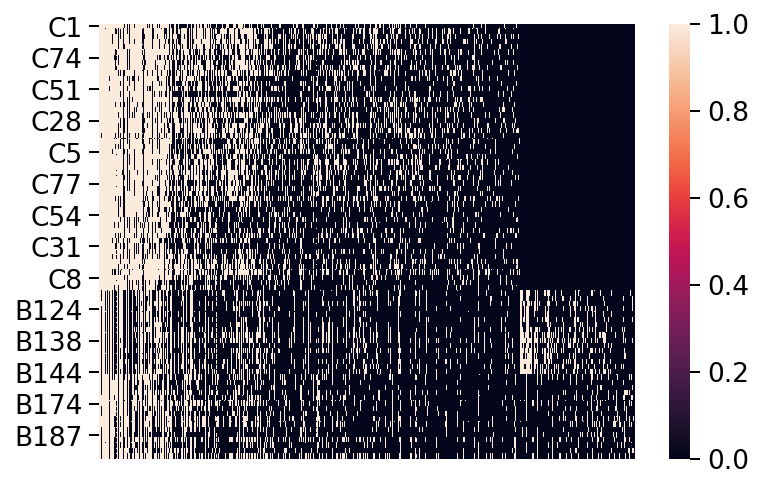

In [8]:

data= pd.concat((data1,data2),sort=False)
sns.heatmap(data>0,xticklabels=[])
data=data.fillna(0)
data= data.loc[:,~(data<=1).all()]



data= pd.DataFrame(clr(multiplicative_replacement(data)), columns=data.columns,index= data.index)


In [10]:

metadata= pd.concat((metadata1,metadata2),sort=False)
metadata.Group=metadata.Group.map(name_mapping)
metadata.Project= metadata.Project.map({'Claire Exp J-feces':'♀','ExpE_ RT/PF/H_ Feces':'♂'})


order=['RT', '34°C', 'ova RT', 'ova 34°C', 'ova\ntranspl.\nRT','ova\ntranspl.\n34°C','34°C\ntranspl.', 'RT\ntranspl.']
group_colors=['k','darkred','darkgrey','red','yellow','orange','pink','violet']



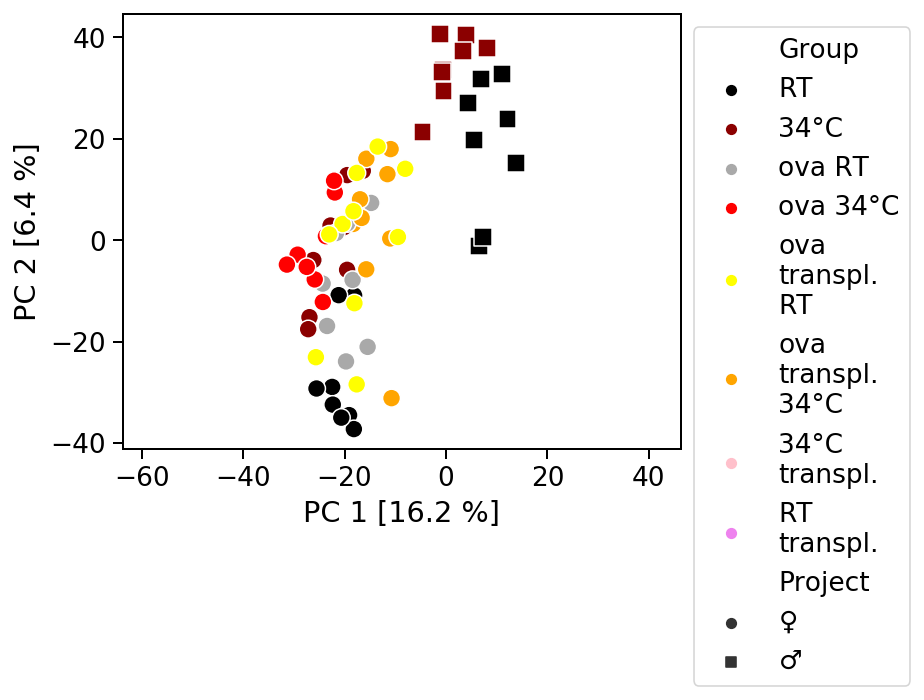

In [11]:
f= plt.figure(figsize=(5,4))

DR= DimensionalReduction.DimensionalReduction(data)
ax =DR.plot_Components_2D(hue=metadata.Group,s=80,
                          style=metadata.Project,
                          style_order=['♀', '♂'],
                          markers=['o','s'],
                         hue_order=order, palette= group_colors)
ax.axis('equal')
ax.legend(bbox_to_anchor=(1,1))
hs.plotting.saveplot('PCA_ova_sham_male',**plt_params)